<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4

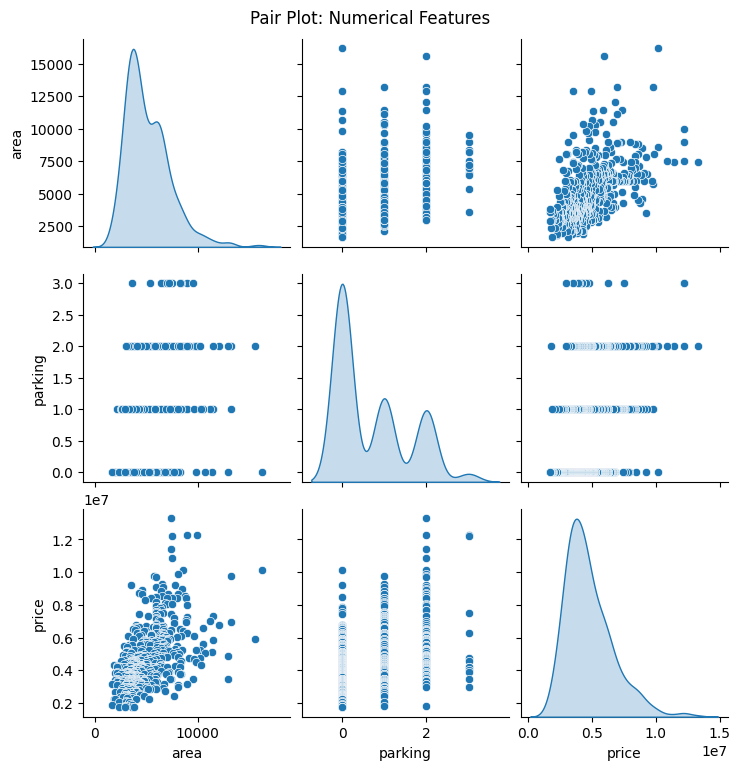

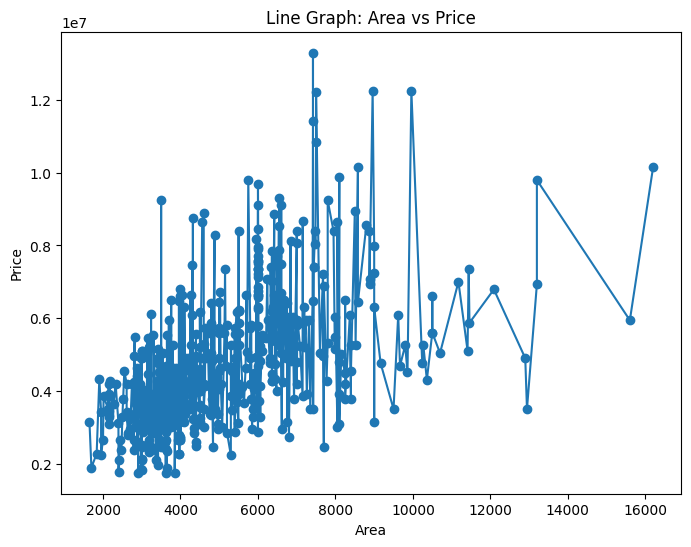

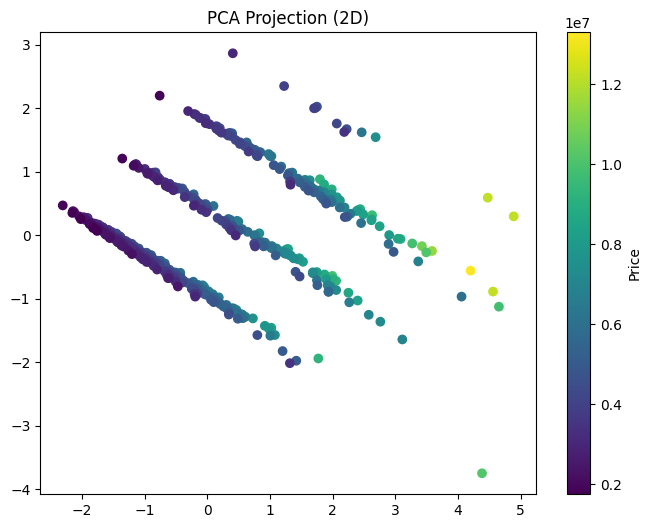

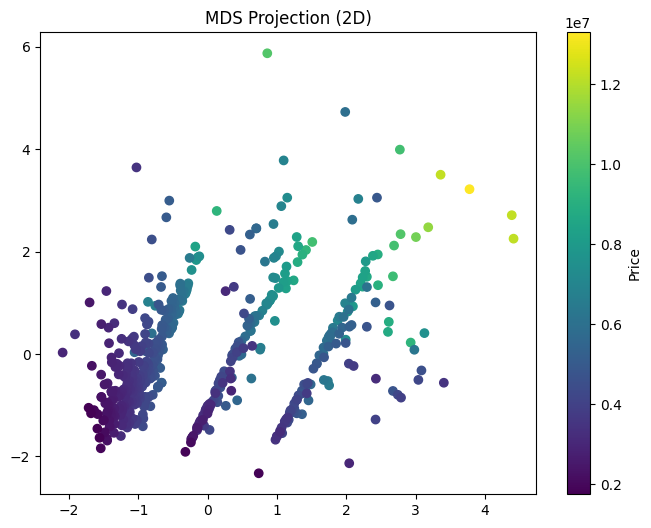

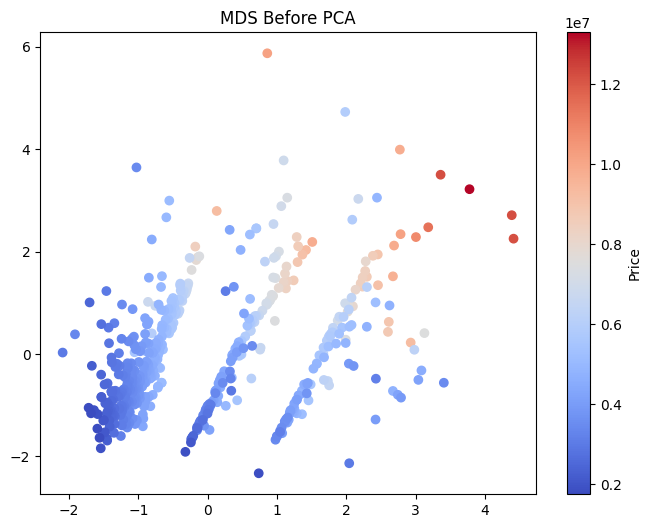

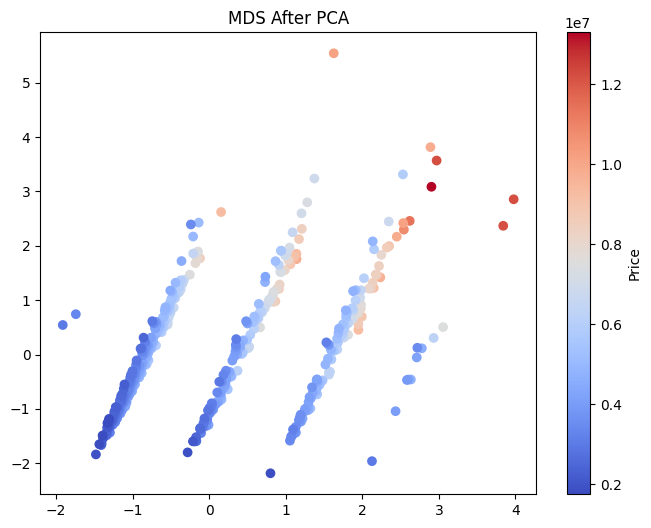

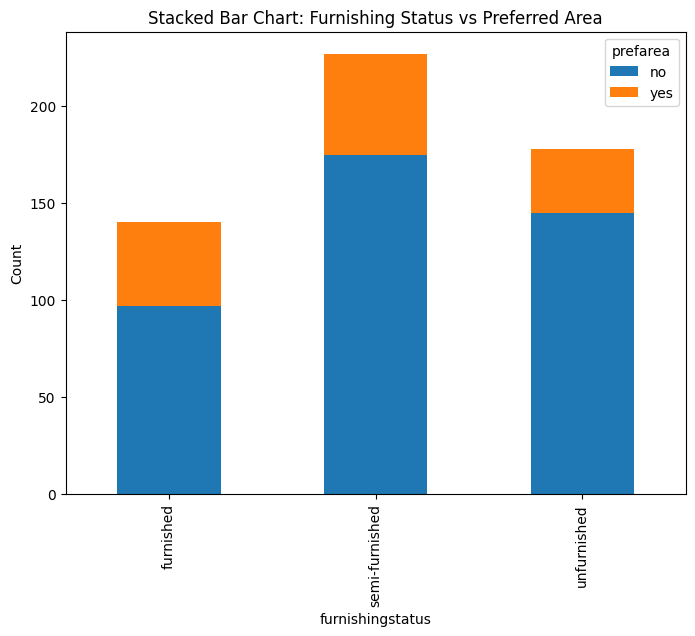

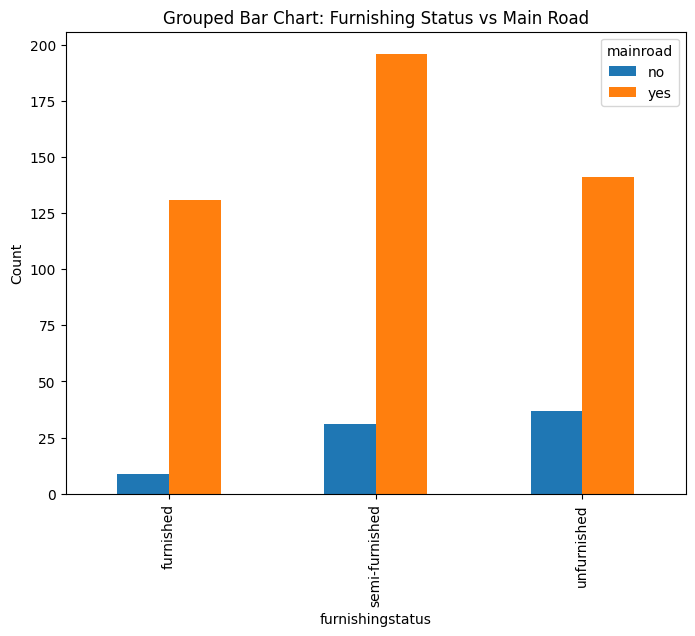

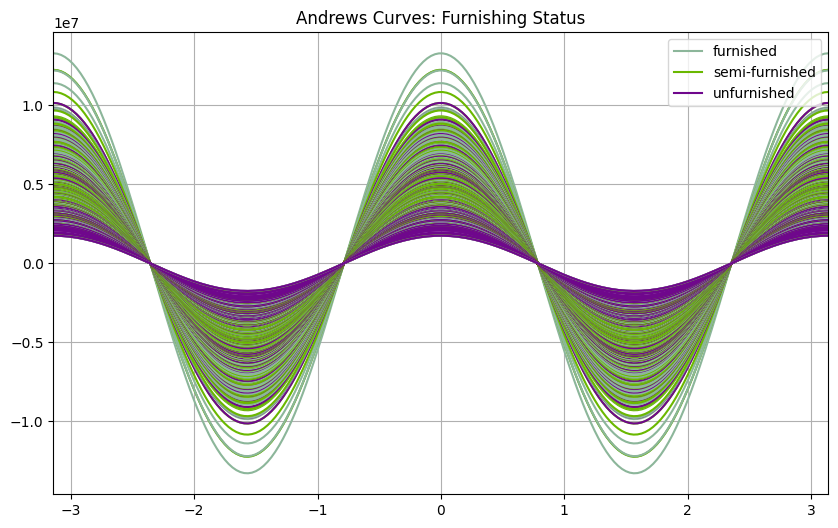

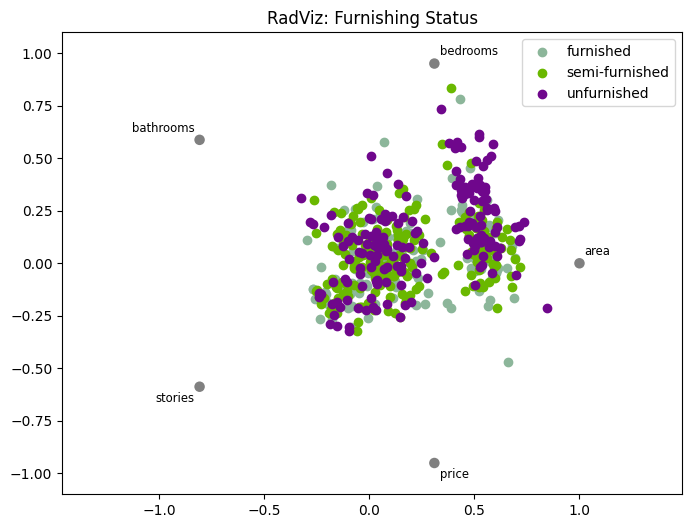

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves, radviz

# Load dataset
df = pd.read_csv("Housing.csv")
df.head()
df.info()
print(df.describe())


# -------------------- PAIR PLOT (Scatterplot Matrix) --------------------
features = ['area', 'parking', 'price']
sns.pairplot(df[features], diag_kind="kde")
plt.suptitle("Pair Plot: Numerical Features", y=1.02)
plt.show()

# -------------------- LINE GRAPH --------------------
plt.figure(figsize=(8,6))
df_sorted = df.sort_values(by="area")
plt.plot(df_sorted['area'], df_sorted['price'], marker='o')
plt.title("Line Graph: Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# -------------------- PCA vs MDS --------------------
X = df[features].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# PCA plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['price'], cmap='viridis')
plt.colorbar(label="Price")
plt.title("PCA Projection (2D)")
plt.show()

# MDS plot
plt.figure(figsize=(8,6))
plt.scatter(X_mds[:,0], X_mds[:,1], c=df['price'], cmap='viridis')
plt.colorbar(label="Price")
plt.title("MDS Projection (2D)")
plt.show()

# -------------------- MDS BEFORE vs AFTER PCA --------------------
# MDS before PCA (already computed as X_mds)

# Apply PCA first, then MDS on reduced space
X_pca_10 = PCA(n_components=2).fit_transform(X_scaled)
X_mds_after = MDS(n_components=2, random_state=42).fit_transform(X_pca_10)

# Plot before PCA
plt.figure(figsize=(8,6))
plt.scatter(X_mds[:,0], X_mds[:,1], c=df['price'], cmap='coolwarm')
plt.colorbar(label="Price")
plt.title("MDS Before PCA")
plt.show()

# Plot after PCA
plt.figure(figsize=(8,6))
plt.scatter(X_mds_after[:,0], X_mds_after[:,1], c=df['price'], cmap='coolwarm')
plt.colorbar(label="Price")
plt.title("MDS After PCA")
plt.show()

# -------------------- STACKED BAR CHART --------------------
stacked_data = df.groupby(['furnishingstatus','prefarea']).size().unstack(fill_value=0)
stacked_data.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Stacked Bar Chart: Furnishing Status vs Preferred Area")
plt.ylabel("Count")
plt.show()

# -------------------- GROUPED BAR CHART --------------------
grouped_data = df.groupby(['furnishingstatus','mainroad']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', figsize=(8,6))
plt.title("Grouped Bar Chart: Furnishing Status vs Main Road")
plt.ylabel("Count")
plt.show()



# -------------------- ANDREWS CURVES --------------------
plt.figure(figsize=(10,6))
andrews_curves(df[['area','bedrooms','bathrooms','stories','price','furnishingstatus']], 'furnishingstatus')
plt.title("Andrews Curves: Furnishing Status")
plt.show()

# -------------------- RADVIZ --------------------
plt.figure(figsize=(8,6))
radviz(df[['area','bedrooms','bathrooms','stories','price','furnishingstatus']], 'furnishingstatus')
plt.title("RadViz: Furnishing Status")
plt.show()

